## Part 3: Consuming data using Kafka
In this task, we will implement an Apache Kafka consumer to consume the data from part 2.  

- In this part, use Kafka consumer to consume the streaming data published from task 2.8.
- This part doesn’t require parallel processing, you don’t need to use Spark. 
- Please use pandas or Python functions to do the simple calculations for visualisation.

In [7]:
# Consumer
%matplotlib notebook

# import statements
from time import sleep
from kafka3 import KafkaConsumer
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
from json import loads

hostip = "kafka"
app_topic = "application_pred_stream"
total_topic = "total_credit"


def connect_kafka_consumer(topic):
    _consumer = None
    try:
        _consumer = KafkaConsumer(topic,
                                  consumer_timeout_ms=10000, 
                                  bootstrap_servers=[f'{hostip}:9092'],
                                  value_deserializer=lambda x: loads(x.decode('ascii')),
                                  api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

1. Plot a bar chart showing the number of applications and the number of predicted default applications side-by-side(see the illustration from the specification as an example). For every batch, your diagram will be updated with two additional bars. The x-axis is datetime, y-axis is the number of applications.


<IPython.core.display.Javascript object>


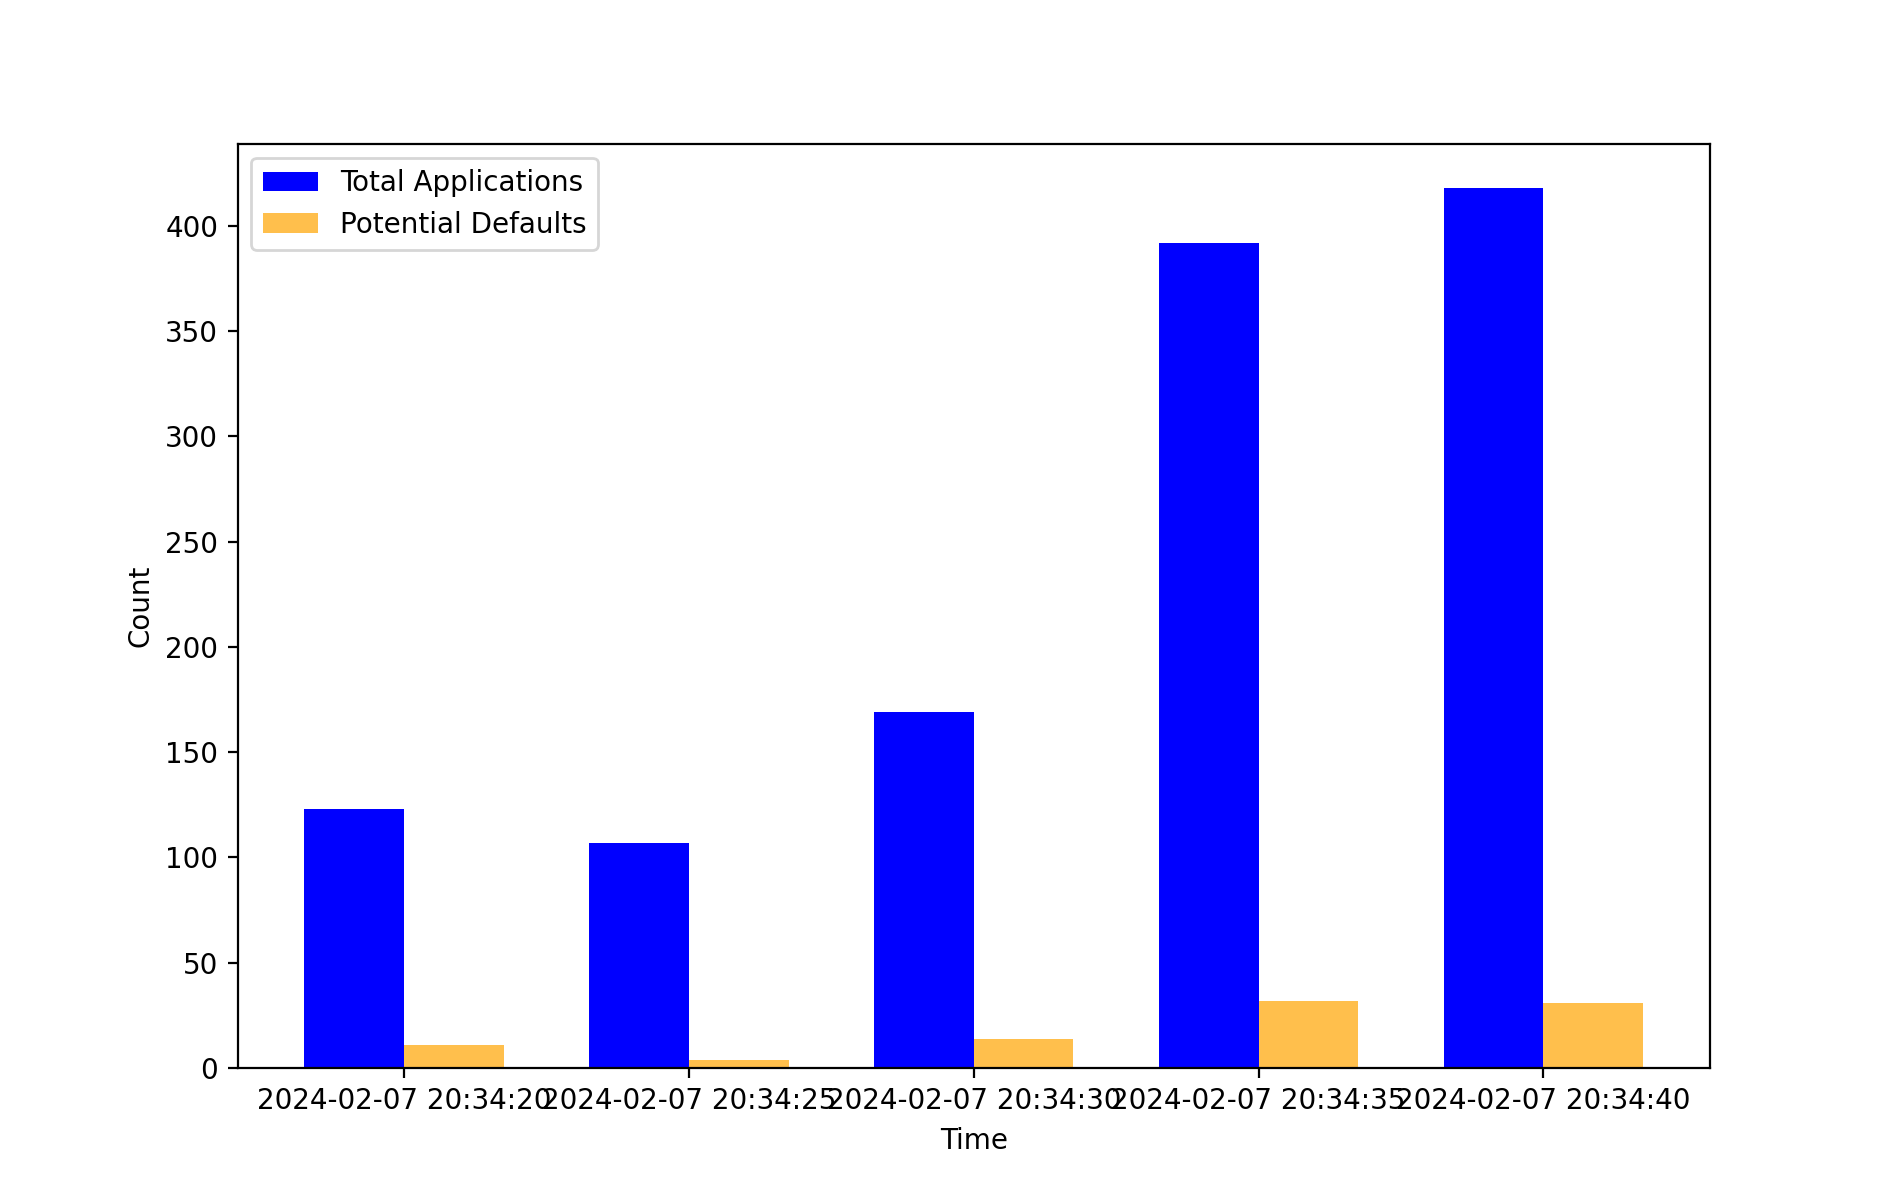

Waiting for messages


KeyboardInterrupt: 

In [11]:
def init_plots():
    try:
        width = 9.5
        height = 6
        fig, ax = plt.subplots(figsize=(width, height))  # create new figure and axes
        ax.set_xlabel('Time')
        ax.set_ylabel('Count')
        fig.show()  # displaying the figure
        fig.canvas.draw()  # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
               

def consume_message(consumer, fig, ax):
    try:
        print('Waiting for messages')
        
        datalist = []
        index = 0
        x, y1, y2 = [], [], []
        while True:
            for msg in consumer:
                data = eval(str(msg.value))
                datalist.append(data)
            #print(datalist)
            #print(type((datalist[0])))
            
            if len(datalist) > 0:
                ts = datalist[index]['ts']
                dt_obj = datetime.strptime(ts, '%Y-%m-%dT%H:%M:%S.%f%z')
                formatted_ts = dt_obj.strftime("%Y-%m-%d %H:%M:%S")
                #print(formatted_ts)
                x.append(formatted_ts)
                #print(x)
                total_apps = len(datalist[index:])
                #print(total_apps)
                y1.append(total_apps)
                #print(y1)
            
                potential_def = 0
                
                for dict in datalist[index:]:
                    if dict['prediction'] == 1:
                        potential_def += 1
                #print(potential_def)    
                y2.append(potential_def)
                #print(y2)
                index = index + total_apps
                
                ax.clear()
                x_index = range(len(x))
                bar_width = 0.35
                
                # Plot the bars for 'Total Applications'
                ax.bar([pos + 0 * bar_width for pos in x_index], y1, bar_width, label='Total Applications', color='blue')

                # Plot the bars for 'Predicted Defaults'
                ax.bar([pos + 1 * bar_width for pos in x_index], y2, bar_width, label='Potential Defaults', alpha=0.7, color='orange')

                ax.set_xlabel('Time')
                ax.set_ylabel('Count')
                ax.legend()
                ax.set_xticks([pos + (bar_width / 2) for pos in x_index])
                ax.set_xticklabels(x, ha = 'center')
                fig.canvas.draw()
                ax.set_xlabel('Time')
                ax.set_ylabel('Count')
                ax.legend()
                fig.canvas.draw()
                #print(len(x))
                
                if len(x) > 4:
                    x.pop(0)
                    y1.pop(0)
                    y2.pop(0)
                
                
    except Exception as ex:
        print(str(ex)) 
        
consumer = connect_kafka_consumer(app_topic)
fig, ax = init_plots()
consume_message(consumer, fig, ax)    
    

2. With streaming data from 7b’s Kafka topic, plot a cumulative line chart and bar chart of required credits, and annotate every 15 seconds with a numerical valued label. Please see the figure from the specification as an example.


<IPython.core.display.Javascript object>


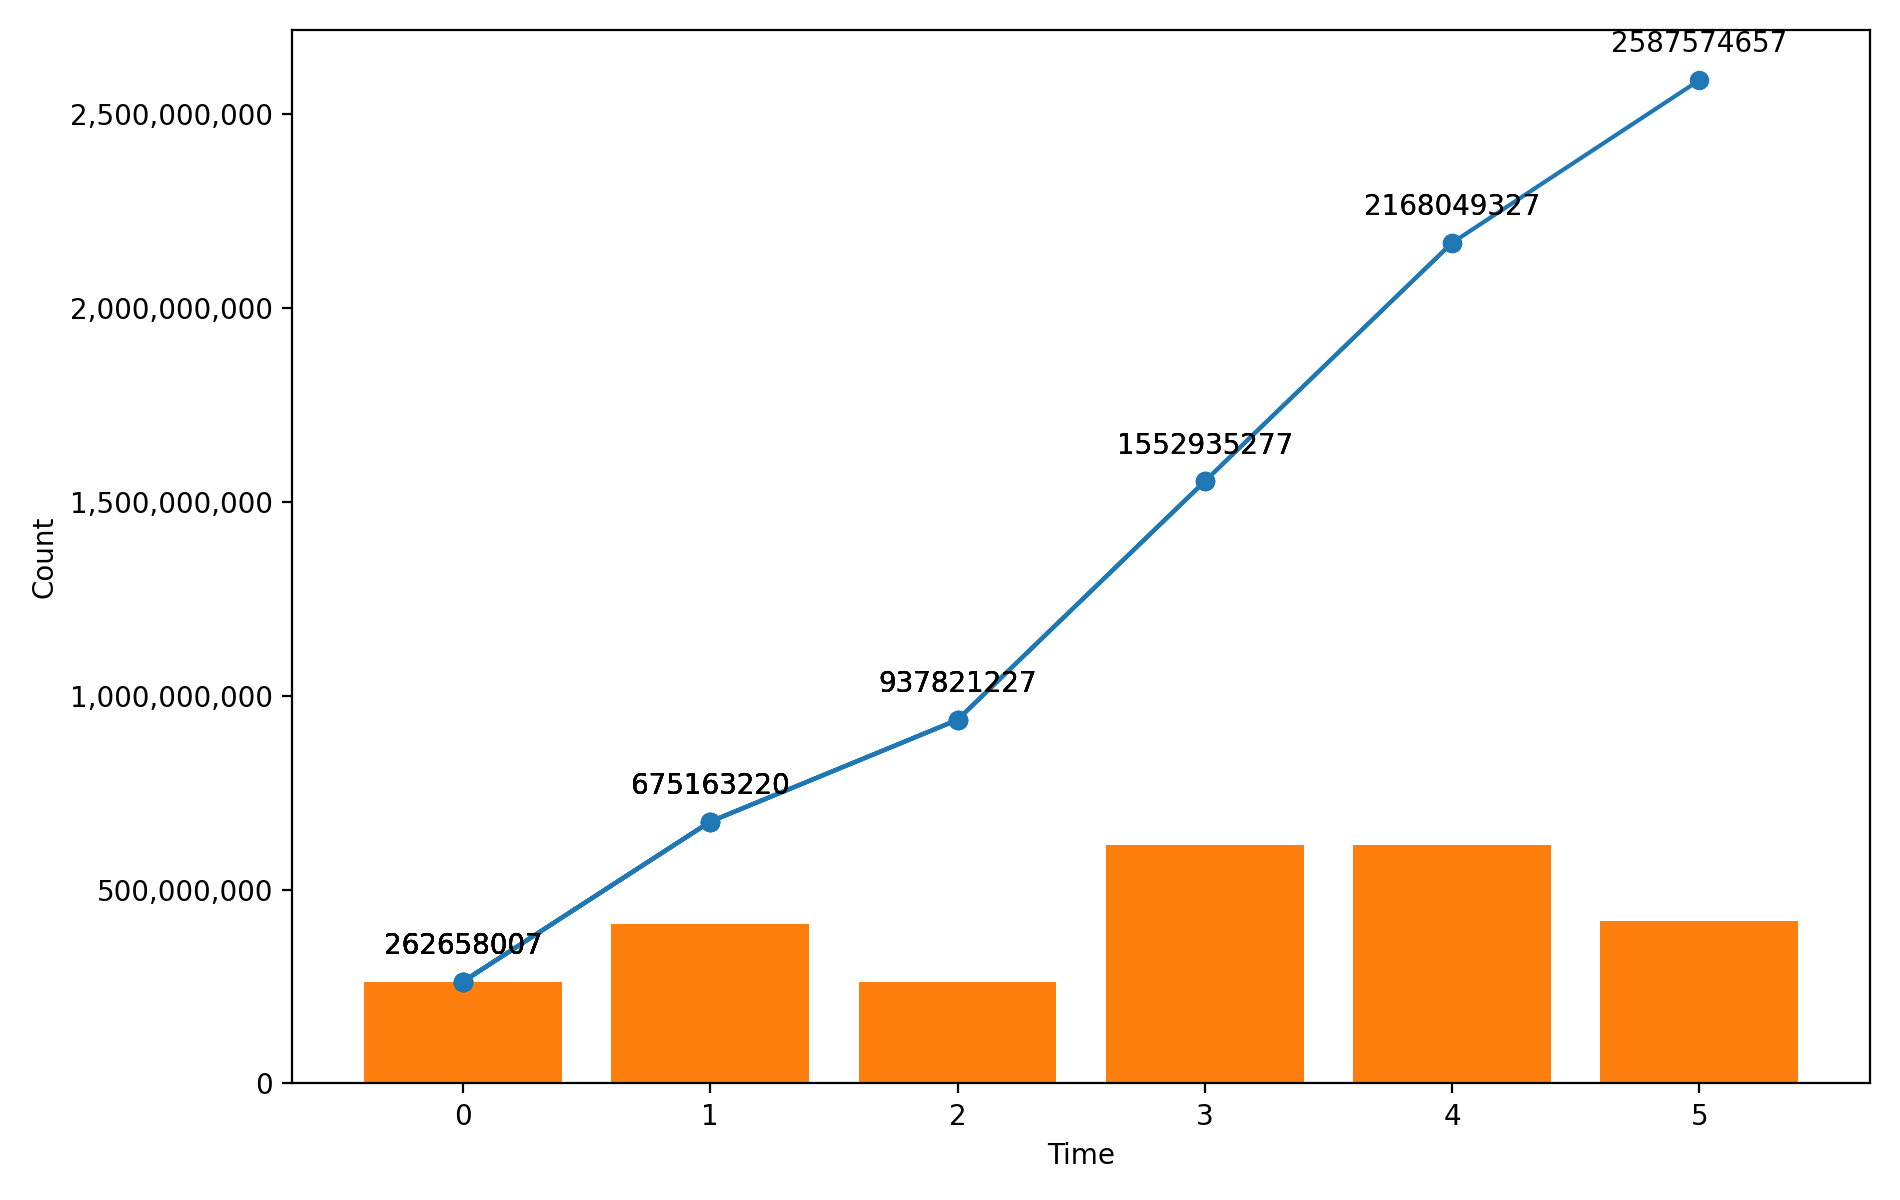

Waiting for messages


KeyboardInterrupt: 

In [12]:
from matplotlib.ticker import FuncFormatter

def init_plots():
    try:
        width = 9.5
        height = 6
        fig, ax = plt.subplots(figsize=(width, height))  # create new figure and axes
        ax.set_xlabel('Time')
        ax.set_ylabel('Count')
        fig.show()  # displaying the figure
        fig.canvas.draw()  # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
               

def consume_message(consumer, fig, ax):
    try:
        print('Waiting for messages')
        
        datalist = []
        index = 0
        y1, y2 = [], []
        total = 0
        
        while True:
            for msg in consumer:
                data = eval(str(msg.value))
                datalist.append(data)
            #print(datalist)
            
            if len(datalist) > 0:
                data_num = len(datalist[index:])
                #print(data_num)
                
                for i in datalist[index:]:
                    total_credit = int(i['total_requested_credit'])
                    #print(total_credit)
                    y1.append(total_credit)
                    total += total_credit
                    y2.append(total)
                    index += data_num
                    
                 # Update the cumulative line chart
                ax.plot(y2, color='tab:blue', marker='o')
    
                for x, y in enumerate(y2):
                    ax.annotate(y, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', label = 'Cumulative credit')
    
                # Update the bar chart
                x_positions = range(0, len(y1))
                ax.bar(x_positions, y1, color='tab:orange', width=0.8, label = 'total credit')  # Adjust the width as needed
        
                # Adjust the plot layout
                plt.tight_layout()
                
                ax.set_xticks(x_positions)
                ax.set_xticklabels(x_positions)
                ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
        
                # Draw the plot
                fig.canvas.draw() 
                    
    except Exception as ex:
        print(str(ex)) 
        
consumer = connect_kafka_consumer(total_topic)
fig, ax = init_plots()
consume_message(consumer, fig, ax)    
           